# Técnicas y modelos de clasificación


In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split #
from sklearn.tree import DecisionTreeClassifier # Clasificador que vamos a utilizar
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import graphviz #para la representación der arbol de decisión
from sklearn import tree

In [2]:
df = pd.read_csv('sf_crimenes.csv')

En el enunciado se nos pide que se realice según el momento del día, día de la semana y distrito. Por ello, se procede a la eliminación de aquellos atributos que no se van a utilizar y de los NAN.

In [3]:
df = df.drop(['Descript', 'Resolution', 'Address', 'X', 'Y'], axis=1) #Columnas que se eliminan
df = df.dropna(subset=['Dates', 'Category', 'DayOfWeek', 'PdDistrict'])
df['Dates'] = pd.to_datetime(df['Dates']).dt.time # Solo nos interesa la parte de la hora, no la fecha, convertimos esa columna a que solo nos muestre la hora

Se transforman los valores de la columna Dates según el momento del día, diferenciando ente 3 clases (Mañana, tarde y noche)

In [4]:
for x in range (0, len(df)):
    if df.Dates[x] >= datetime.time(0,0) and df.Dates[x] < datetime.time(8,0): #Desde las 00:00 hasta las 7:59
        df.Dates[x] = 'Noche'
    elif df.Dates[x] >= datetime.time(8,0) and df.Dates[x] < datetime.time(16,0): #Desde las 8:00 hasta las 15:59
        df.Dates[x] = 'Mañana'
    elif df.Dates[x] >= datetime.time(16,0) and df.Dates[x] <= datetime.time(23,59): #Desde las 16:00 hasta las 23:59
        df.Dates[x] = 'Tarde'

Se procede a la categorización de todas las columnas, para ello se utiliza labelEncoder

In [5]:
le = LabelEncoder()

df.Dates = le.fit_transform(df.Dates)
df.Category	 = le.fit_transform(df.Category)
df.DayOfWeek = le.fit_transform(df.DayOfWeek)
df.PdDistrict = le.fit_transform(df.PdDistrict)

In [6]:
target = df.Category # Seleccionamos la columna de los crimenes
datos = df.drop(columns=['Category'])#Quitamos la columna Category para tener solo los datos

#### División 1
##### 70% entrenamiento y 30% tests

In [7]:
x_train, x_test, y_train, y_test = train_test_split(datos, target, test_size=0.3) #70% entrenamiento y 30% test

In [1]:
clf = DecisionTreeClassifier()# Creacmos elclasificadr del tipo Decision Tree
clf = clf.fit(x_train,y_train)# Entrenamiento

NameError: name 'DecisionTreeClassifier' is not defined

In [9]:
accuracy_score(y_test, clf.predict(x_test)) #Precisión

0.23444444444444446

#### División 2
##### 80% entrenamiento y 20% tests

In [10]:
x_train, x_test, y_train, y_test = train_test_split(datos, target, test_size=0.2) 
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
accuracy_score(clf.predict(x_test), y_test)

0.27666666666666667

Podemos observar que ambas divisiones tienen un accuracy parecido, así que se utilizará aquella esa divisió que tenga un valor mayor.

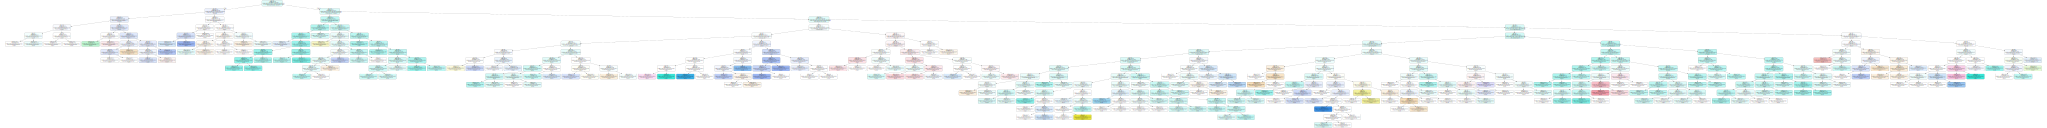

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

 ##### Prueba para los 3 casos enunciados

Se crea un dataframe con 3 opciones de crimenes, los cuales se pasarán para su clasificación

In [12]:
crimes = [[0, 4,8], # Por la Mañana un Jueves es Taraval
         [1, 2, 5], # Por la Noche un Sábado en PArk
         [0, 1, 1]] # Por la mañana un Lunes en Central
crimenes= pd.DataFrame(crimes)

In [13]:
pred_crimes = clf.predict(crimenes) #Llamamos al clasificador para que prediga sobre los coches creados

In [14]:
for x in range (0, len(pred_crimes)):
    if x==0:
        print("Por la Mañana un Jueves en el distrito Taraval")
    elif x== 1:
        print("Por la Noche un Sábado en el distrito Park")
    elif x== 2:
        print("Por la mañana un Lunes en el distrito Central")
    
    if pred_crimes[x]== 0:
        print("El crimen pertenecerá a la clase: ARSON\n")
    elif pred_crimes[x]== 1:
        print("El crimen pertenecerá a la clase: ASSAULT\n")
    elif pred_crimes[x]== 2:
        print("El crimen pertenecerá a la clase: BRIBERY\n")
    elif pred_crimes[x]== 3:
        print("El crimen pertenecerá a la clase: BURGLARY\n")
    elif pred_crimes[x]== 4:
        print("El crimen pertenecerá a la clase: DISORDERLY CONDUCT\n")
    elif pred_crimes[x]== 5:
        print("El crimen pertenecerá a la clase: DRIVING UNDER THE INFLUENCE\n")
    elif pred_crimes[x]== 6:
        print("El crimen pertenecerá a la clase: DRUG/NARCOTIC\n")
    elif pred_crimes[x]== 7:
        print("El crimen pertenecerá a la clase: DRUNKENNESS\n")
    elif pred_crimes[x]== 8:
        print("El crimen pertenecerá a la clase: EMBEZZLEMENT\n")
    elif pred_crimes[x]== 9:
        print("El crimen pertenecerá a la clase: FAMILY OFFENSES\n")
    elif pred_crimes[x]== 10:
        print("El crimen pertenecerá a la clase: FORGERY/COUNTERFEITING\n")
    elif pred_crimes[x]== 11:
        print("El crimen pertenecerá  a la clase: FRAUD\n")
    elif pred_crimes[x]== 12:
        print("El crimen pertenecerá a la clase: KIDNAPPING\n")
    elif pred_crimes[x]== 13:
        print("El crimen pertenecerá a la clase: LARCENY/THEFT\n")
    elif pred_crimes[x]== 14:
        print("El crimen pertenecerá a la clase: LIQUOR LAWS\n")
    elif pred_crimes[x]== 15:
        print("El crimen pertenecerá a la clase: MISSING PERSON\n")
    elif pred_crimes[x]== 16:
        print("El crimen pertenecerá a la clase: NON-CRIMINAL\n")
    elif pred_crimes[x]== 17:
        print("El crimen pertenecerá a la clase: OTHER OFFENSES\n")
    elif pred_crimes[x]== 18:
        print("El crimen pertenecerá a la clase: PROSTITUTION\n")
    elif pred_crimes[x]== 19:
        print("El crimen pertenecerá a la clase: ROBBERY\n")
    elif pred_crimes[x]== 20:
        print("El crimen pertenecerá a la clase: RUNAWAY\n")
    elif pred_crimes[x]== 21:
        print("El crimen pertenecerá a la clase: SECONDARY CODES\n")
    elif pred_crimes[x]== 22:
        print("El crimen pertenecerá a la clase: SEX OFFENSES FORCIBLE\n")
    elif pred_crimes[x]== 23:
        print("El crimen pertenecerá a la clase: STOLEN PROPERTY\n")
    elif pred_crimes[x]== 24:
        print("El crimen pertenecerá  a la clase: SUICIDE\n")
    elif pred_crimes[x]== 25:
        print("El crimen pertenecerá a la clase: SUSPICIOUS OCC\n")
    elif pred_crimes[x]== 26:
        print("El crimen pertenecerá a la clase: TRESPASS\n")
    elif pred_crimes[x]== 27:
        print("El crimen pertenecerá a la clase: VANDALISM\n")
    elif pred_crimes[x]== 28:
        print("El crimen pertenecerá a la clase: VEHICLE THEFT\n")
    elif pred_crimes[x]== 29:
        print("El crimen pertenecerá a la clase: WARRANTS\n")
    elif pred_crimes[x]== 30:
        print("El crimen pertenecerá a la clase: WEAPON LAWS\n")

Por la Mañana un Jueves en el distrito Taraval
El crimen pertenecerá a la clase: NON-CRIMINAL

Por la Noche un Sábado en el distrito Park
El crimen pertenecerá a la clase: OTHER OFFENSES

Por la mañana un Lunes en el distrito Central
El crimen pertenecerá a la clase: LARCENY/THEFT

